# Sentiment Bases Product Recommendation

## Exploratory Data Analysis

In [1]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

Let's read train and test datasets.

In [2]:
df  = pd.read_csv('Dataset/sample30.csv')

In [3]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, n...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [4]:
df.shape

(30000, 15)

In [5]:
df.nunique()

id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64

There are 271 unique products and 24914 unique username.

In [6]:
df['name'].unique()

array(['Pink Friday: Roman Reloaded Re-Up (w/dvd)',
       'Lundberg Organic Cinnamon Toast Rice Cakes',
       'K-Y Love Sensuality Pleasure Gel',
       'J.R. Watkins Hand Cream, Lemon Cream',
       'Ambi Complexion Cleansing Bar',
       "Johnson's Baby Bubble Bath and Wash, 15oz",
       'Olay Regenerist Deep Hydration Regenerating Cream',
       'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)',
       'Heinz Tomato Ketchup, 38oz',
       'Kind Dark Chocolate Chunk Gluten Free Granola Bars - 5 Count',
       'Pantene Color Preserve Volume Shampoo, 25.4oz',
       'Aussie Aussome Volume Shampoo, 13.5 Oz',
       "Cars Toon: Mater's Tall Tales", 'CeraVe SA Renewing Cream',
       'Solo Foods Almond Paste',
       'Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count',
       'Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler',
       'Pearhead Id Bracelet Frame',
       'Craft Punch Giga Scallop Circle 45 24687534 To 334',
       'Neutrogena

In [7]:
df['id'].unique()

array(['AV13O1A8GV-KLJ3akUyj', 'AV14LG0R-jtxr-f38QfS',
       'AV16khLE-jtxr-f38VFn', 'AV1d76w7vKc47QAVhCqn',
       'AV1h6gSl-jtxr-f31p40', 'AV1h6Gu0glJLPUi8IjA_',
       'AV1l8zRZvKc47QAVhnAv', 'AV1YGDqsGV-KLJ3adc-O',
       'AV1YIch7GV-KLJ3addeG', 'AV1YlENIglJLPUi8IHsX',
       'AV1YmBrdGV-KLJ3adewb', 'AV1YmDL9vKc47QAVgr7_',
       'AV1Ymf_rglJLPUi8II2v', 'AV1Yn94nvKc47QAVgtst',
       'AV1Ynb3bglJLPUi8IJxJ', 'AV1YneDPglJLPUi8IJyQ',
       'AV1YnUMYglJLPUi8IJpK', 'AV1Yo6FPglJLPUi8IK3u',
       'AV1YpiJvvKc47QAVguxy', 'AV1YqAaMGV-KLJ3adiDj',
       'AV1Ys0kTvKc47QAVgx1C', 'AV1YtGjdglJLPUi8IOfJ',
       'AV1ZSp2uglJLPUi8IQFy', 'AV1ZT7GLglJLPUi8IQLI',
       'AV1ZVIgy-jtxr-f31W9N', 'AV2AvGnjGV-KLJ3alTQH',
       'AV2Avn5dGV-KLJ3alTjq', 'AV2BOOWS-jtxr-f39GPS',
       'AVpe_5U_ilAPnD_xSrxG', 'AVpe_dxlilAPnD_xSiHI',
       'AVpe_N91LJeJML43z4jD', 'AVpe_pDG1cnluZ0-bjSf',
       'AVpe_y-I1cnluZ0-bmvh', 'AVpe3_ikilAPnD_xPykq',
       'AVpe31o71cnluZ0-YrSD', 'AVpe38Uy1cnluZ0-YuJR',
       'AV

The columns `id` and `name` are unique id and name of the product. 

In [8]:
id_name= df[['id','name', 'brand']].drop_duplicates()
id_name.reset_index(drop=True, inplace=True)

In [9]:
id_name['name_with_brand']= id_name['name'] + str(' by ') + id_name['brand']
id_name.drop(columns=['name', 'brand'], inplace=True)
id_name.head()

,id,name_with_brand
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd) by Universal Music
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes by Lundberg
2,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel by K-Y
3,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream by J.R. Watkins"
4,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar by AMBI


In [11]:
id_name.shape

(271, 2)

In [13]:
id_name.to_csv('Dataset/id_name.csv', index=False)

Since we only use reviews, title and sentiment column for sentiment prediction.

In [14]:
sent_df= df[['reviews_text', 'reviews_title', 'user_sentiment']]

Checking for the sentiment classes.

In [15]:
(sent_df['user_sentiment'].value_counts()/sent_df.shape[0])*100

Positive    88.773333
Negative    11.223333
Name: user_sentiment, dtype: float64

In [16]:
sent_df['user_sentiment']= sent_df['user_sentiment'].map({'Positive':1, 'Negative':0})
sent_df.head()

<ipython-input-16-396678723a36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['user_sentiment']= sent_df['user_sentiment'].map({'Positive':1, 'Negative':0})


,reviews_text,reviews_title,user_sentiment
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...,Just Awesome,1.0
1,Good flavor. This review was collected as part of a promotion.,Good,1.0
2,Good flavor.,Good,1.0
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, n...",Disappointed,0.0
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,0.0


C:\Users\GAURAV AGRAWAL\deployment_upgrad\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_sentiment', ylabel='count'>

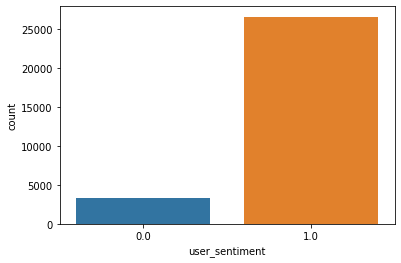

In [17]:
sns.countplot(sent_df['user_sentiment'])

There are more reviews with postive sentiment than with negative ones. The data is skewed so will be needing class imbalance techniques.

In [18]:
sent_df['reviews']= sent_df['reviews_title'] +str(' ')+ sent_df['reviews_text']
sent_df.drop(columns=['reviews_text','reviews_title'],inplace=True)
sent_df.head()

<ipython-input-18-d68157022038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['reviews']= sent_df['reviews_title'] +str(' ')+ sent_df['reviews_text']
C:\Users\GAURAV AGRAWAL\deployment_upgrad\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,user_sentiment,reviews
0,1.0,Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metapho...
1,1.0,Good Good flavor. This review was collected as part of a promotion.
2,1.0,Good Good flavor.
3,0.0,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. Fo..."
4,0.0,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.


In [19]:
sent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_sentiment  29999 non-null  float64
 1   reviews         29810 non-null  object 
dtypes: float64(1), object(1)
memory usage: 468.9+ KB


In [20]:
sent_df.loc[sent_df['user_sentiment'].isnull(),:].head()

,user_sentiment,reviews
28354,NaN,a super hit with my children. they loved it!!?? my kids absolutely loved this film so much that we watched it twice. Having a digital copy means that every time we get in the car we get to watch i...


In [21]:
sent_df.loc[sent_df['reviews'].isnull(),:].head()

,user_sentiment,reviews
1239,1.0,NaN
1441,1.0,NaN
1442,0.0,NaN
1443,1.0,NaN
1444,1.0,NaN


Dropping all the rows in which reviews and sentiment is missing.

In [22]:
sent_df= sent_df.loc[~sent_df['reviews'].isnull(),:]
sent_df= sent_df.loc[~sent_df['user_sentiment'].isnull(),:]
sent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29809 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_sentiment  29809 non-null  float64
 1   reviews         29809 non-null  object 
dtypes: float64(1), object(1)
memory usage: 698.6+ KB


In [23]:
sent_df['reviews'][0]

"Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

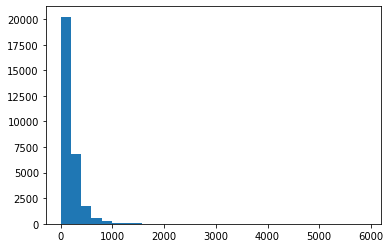

In [24]:
length_df_reviews = sent_df['reviews'].str.len()
plt.hist(length_df_reviews, bins=30)
plt.show()

In [25]:
length_df_reviews.describe(percentiles=[0.995,0.99,0.95])

count    29809.000000
mean       202.302627
std        189.214089
min          6.000000
50%        149.000000
95%        513.000000
99%        912.000000
99.5%     1144.760000
max       5894.000000
Name: reviews, dtype: float64

There are some reviews with very high length. 99.5% of the data have reviews whose lenght is less 1144. So we will keep only reviews with length less than 1000.

In [26]:
sent_df= sent_df.loc[sent_df['reviews'].str.len()<1000, :]

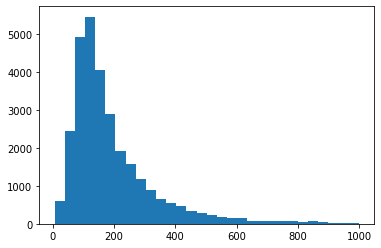

In [27]:
length_df_reviews = sent_df['reviews'].str.len()
plt.hist(length_df_reviews, bins=30)
plt.show()

In [28]:
#loss of data
print('data loss due to shorting length of reviews is {0} %'.format((1-(sent_df.shape[0]/29809))*100))

data loss due to shorting length of reviews is 0.8286088094199728 %


Splitting the data into train and test for bulding a model to predict user sentiment based on the review.

In [29]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(sent_df, test_size=0.30, random_state=31)

In [30]:
print('train data shape is ', train.shape)
print('test data shape is ', test.shape)

train data shape is  (20693, 2)
test data shape is  (8869, 2)


In [31]:
print('Postive sentiments in train data is ', train['user_sentiment'].mean())
print('Postive sentiments in test data is ', test['user_sentiment'].mean())

Postive sentiments in train data is  0.8870632581066061
Postive sentiments in test data is  0.8876987258991994


## Text PreProcessing and Cleaning

Let's check out some positive sentiments reviews from train dataset.

In [32]:
train[train['user_sentiment'] == 1].head(10)

,user_sentiment,reviews
18740,1.0,"Fresh Smell - Could be bigger I really like the smell and clean look I get on my tub, sink and toilet after using the disinfecting wipes. The fresh smell is wonderful rather than a chemically smel..."
29820,1.0,"Works and smells great! This conditioner leaves my hair silky feeling, which is very uncommon for my hair. It smells amazing, but the 48 hour rule does not work for me. However, I will continue to..."
25124,1.0,Classics Gotta love the classics. Excellent remake. Couldn't wait to see it since I missed it in theaters.
13630,1.0,"Love Clorox wipes I like using clorox wipes because they are convenient, and disinfect. They don't streak like another brand that shall not be named. :) This review was collected as part of a prom..."
9875,1.0,"Love Clorox wipes The only product I use when I need to do general maintenence cleanup like wiping countertops, wiping off the stove, etc."
17196,1.0,postbound album recieved product very quickly and in good condition!!
1586,1.0,blu ray its a blu ray. it was a fun movie. love johnny depp.
23777,1.0,"The King of Monsters Makes His Return(sort of) Being a Fan of The Giant Lizard from Japan, I was hoping for a little more back story on his origin. Seems to me, the writers got sidetracked, but th..."
27938,1.0,"Great movie Not as good as the first one, but still a very good movie."
8793,1.0,Love It I really love the wipes they smell good and are so convinent. I Love it. This review was collected as part of a promotion.


<br>
Now check out a few negative sentiment reviews.

In [33]:
train[train['user_sentiment'] == 0].head(10)

,user_sentiment,reviews
21959,0.0,Soap I've tried a lot of different kinds of soap and I keep coming back to caress bar soap.
11123,0.0,"This product can be used anywhere!! I love that I can wipe down the bathroom real quick or wipe down the kitchen. If the kids have been sick I can wipe down toys, the kitchen table anything. I've ..."
18744,0.0,"Clorox does does wonders! Well, needless to say my 3 boys are messy... but with these wipes it's easier to clean up messes as they come along and to keep everything disinfected!! We like the docto..."
26533,0.0,"Please do not use this product on your baby!!!! I bought this product for my son, 8 year old. He plays soccer and I want make sure he is protect from sunburn. However, every time I put on him this..."
6517,0.0,"Clorox Wipes I like the ease of using the Clorox Wipes for cleaning door handles and frames. With 4 kids, I always have finger prints and dirt that needs to be cleaned. This review was collected a..."
20673,0.0,Head Shoulders Conditioner I have never used a separate conditioner product before this review. The conditioner seems to do its job well enough however I prefer my shampoo and conditioner to be al...
12324,0.0,great to use for fast clean up I use all the time for fast clean up with a sick husband at home
13688,0.0,"cleaning I tried the other wipes, they don't even come close to Clorox wipes! Clorox brand allows me to disinfect for my family with confidence This review was collected as part of a promotion."
2207,0.0,Funny If you love crude humor then this movie is definitely for you!
18532,0.0,Does not cover imperfections I bought this to try to cover tiny spider veins on my face. Does not cover just makes my face whiter


<br>
Now we will check the distribution of length of the reviews, in terms of words, in both train and test data.

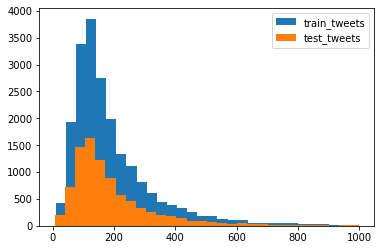

In [34]:
length_train = train['reviews'].str.len()
length_test = test['reviews'].str.len()

plt.hist(length_train, bins=30, label="train_tweets")
plt.hist(length_test, bins=30, label="test_tweets")
plt.legend()
plt.show()

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20693 entries, 18740 to 21494
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_sentiment  20693 non-null  float64
 1   reviews         20693 non-null  object 
dtypes: float64(1), object(1)
memory usage: 485.0+ KB


The review-length distribution is more or less the same in both train and test data.


### Data Cleaning

In [36]:
clean_train = train.copy()
clean_train.head()

,user_sentiment,reviews
18740,1.0,"Fresh Smell - Could be bigger I really like the smell and clean look I get on my tub, sink and toilet after using the disinfecting wipes. The fresh smell is wonderful rather than a chemically smel..."
29820,1.0,"Works and smells great! This conditioner leaves my hair silky feeling, which is very uncommon for my hair. It smells amazing, but the 48 hour rule does not work for me. However, I will continue to..."
25124,1.0,Classics Gotta love the classics. Excellent remake. Couldn't wait to see it since I missed it in theaters.
13630,1.0,"Love Clorox wipes I like using clorox wipes because they are convenient, and disinfect. They don't streak like another brand that shall not be named. :) This review was collected as part of a prom..."
9875,1.0,"Love Clorox wipes The only product I use when I need to do general maintenence cleanup like wiping countertops, wiping off the stove, etc."


__1. Removing url__

In [37]:
clean_train[clean_train['reviews'].str.match(r'http\S+')== True]

,user_sentiment,reviews
17883,0.0,http://www.overstock.com*************** A must have to use with the stamp set.


In [38]:
clean_train['reviews'] = clean_train['reviews'].str.replace("http\S+", "", regex=True)

In [39]:
clean_train[clean_train['reviews'].str.match('http\S+')== True]

,user_sentiment,reviews


__2. Removing numerical and special characters__

In [40]:
clean_train['reviews'] = clean_train['reviews'].str.replace("[^a-zA-Z]", " ", regex=True)

__3. Lowering the case__

In [41]:
clean_train['reviews'] = clean_train['reviews'].apply(lambda x: str(x).lower())

__4. Removing Short Words__

In [42]:
clean_train['reviews'] = clean_train['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

__5. Tokenization__

In [43]:
from nltk.tokenize import word_tokenize
clean_train['reviews'] = clean_train['reviews'].apply(lambda x: word_tokenize(x))

__6. Removing stop words__

In [44]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
clean_train['reviews'] = clean_train['reviews'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])

__7. Stemming__

Here we will use nltk's PorterStemmer() function to normalize the reviews.

In [46]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

clean_train['reviews'] = clean_train['reviews'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [47]:
clean_train.head()

,user_sentiment,reviews
18740,1.0,"[fresh, smell, could, bigger, realli, like, smell, clean, look, get, tub, sink, toilet, use, disinfect, wipe, fresh, smell, wonder, rather, chemic, smell, wish, wipe, larger, sinc, find, doubl]"
29820,1.0,"[work, smell, great, condition, leav, hair, silki, feel, uncommon, hair, smell, amaz, hour, rule, work, howev, continu, use, system, review, collect, part, promot]"
25124,1.0,"[classic, got, ta, love, classic, excel, remak, wait, see, sinc, miss, theater]"
13630,1.0,"[love, clorox, wipe, like, use, clorox, wipe, conveni, disinfect, streak, like, anoth, brand, shall, name, review, collect, part, promot]"
9875,1.0,"[love, clorox, wipe, product, use, need, gener, mainten, cleanup, like, wipe, countertop, wipe, stove, etc]"


In [48]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20693 entries, 18740 to 21494
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_sentiment  20693 non-null  float64
 1   reviews         20693 non-null  object 
dtypes: float64(1), object(1)
memory usage: 485.0+ KB


__8. Spell check__

Here we will use a package pyspellchecker to correct the spelling.

In [49]:
import timeit
from spellchecker import SpellChecker

start = timeit.default_timer()

spell = SpellChecker()

clean_train['correct'] = clean_train['reviews'].apply(lambda x: [spell.correction(i) for i in x])

stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  1335.4912075000002


Now let’s stitch these tokens back together.

In [50]:
clean_train['reviews'] = clean_train['reviews'].apply(lambda x: ' '.join(x))
clean_train['correct'] = clean_train['correct'].apply(lambda x: ' '.join(x))

In [51]:
clean_train.head()

,user_sentiment,reviews,correct
18740,1.0,fresh smell could bigger realli like smell clean look get tub sink toilet use disinfect wipe fresh smell wonder rather chemic smell wish wipe larger sinc find doubl,fresh smell could bigger really like smell clean look get tub sink toilet use disinfect wipe fresh smell wonder rather chemin smell wish wipe larger since find doubt
29820,1.0,work smell great condition leav hair silki feel uncommon hair smell amaz hour rule work howev continu use system review collect part promot,work smell great condition leav hair silk feel uncommon hair smell amaz hour rule work howe continue use system review collect part promote
25124,1.0,classic got ta love classic excel remak wait see sinc miss theater,classic got ta love classic excel remark wait see since miss theater
13630,1.0,love clorox wipe like use clorox wipe conveni disinfect streak like anoth brand shall name review collect part promot,love claro wipe like use claro wipe convent disinfect streak like noth brand shall name review collect part promote
9875,1.0,love clorox wipe product use need gener mainten cleanup like wipe countertop wipe stove etc,love claro wipe product use need gene maintain cleanup like wipe countertop wipe stove etc


In [52]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20693 entries, 18740 to 21494
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_sentiment  20693 non-null  float64
 1   reviews         20693 non-null  object 
 2   correct         20693 non-null  object 
dtypes: float64(1), object(2)
memory usage: 646.7+ KB


In [53]:
clean_train.drop(columns=['reviews'], inplace=True)
clean_train.rename(columns= {'correct':'reviews'}, inplace=True)

Let’s take another look at the first few rows of the combined dataframe.

In [54]:
train.head(10)

,user_sentiment,reviews
18740,1.0,"Fresh Smell - Could be bigger I really like the smell and clean look I get on my tub, sink and toilet after using the disinfecting wipes. The fresh smell is wonderful rather than a chemically smel..."
29820,1.0,"Works and smells great! This conditioner leaves my hair silky feeling, which is very uncommon for my hair. It smells amazing, but the 48 hour rule does not work for me. However, I will continue to..."
25124,1.0,Classics Gotta love the classics. Excellent remake. Couldn't wait to see it since I missed it in theaters.
13630,1.0,"Love Clorox wipes I like using clorox wipes because they are convenient, and disinfect. They don't streak like another brand that shall not be named. :) This review was collected as part of a prom..."
9875,1.0,"Love Clorox wipes The only product I use when I need to do general maintenence cleanup like wiping countertops, wiping off the stove, etc."
17196,1.0,postbound album recieved product very quickly and in good condition!!
1586,1.0,blu ray its a blu ray. it was a fun movie. love johnny depp.
23777,1.0,"The King of Monsters Makes His Return(sort of) Being a Fan of The Giant Lizard from Japan, I was hoping for a little more back story on his origin. Seems to me, the writers got sidetracked, but th..."
27938,1.0,"Great movie Not as good as the first one, but still a very good movie."
21959,0.0,Soap I've tried a lot of different kinds of soap and I keep coming back to caress bar soap.


In [55]:
clean_train.head(10)

,user_sentiment,reviews
18740,1.0,fresh smell could bigger really like smell clean look get tub sink toilet use disinfect wipe fresh smell wonder rather chemin smell wish wipe larger since find doubt
29820,1.0,work smell great condition leav hair silk feel uncommon hair smell amaz hour rule work howe continue use system review collect part promote
25124,1.0,classic got ta love classic excel remark wait see since miss theater
13630,1.0,love claro wipe like use claro wipe convent disinfect streak like noth brand shall name review collect part promote
9875,1.0,love claro wipe product use need gene maintain cleanup like wipe countertop wipe stove etc
17196,1.0,eastbound album recieve product quickly good conduit
1586,1.0,blu ray blu ray fun movi love johnny depp
23777,1.0,king monster make return sort fan giant lizard japan hope littl back story origin seem writer got sidetrack overall movi good
27938,1.0,great movi good first one still good movi
21959,0.0,soap tri lot differ kind soap keep come back caress bar soap


### Understanding the common words used in the reviews: WordCloud

Here we will plot wordcloud for both positive and negative sentiment reviews to check for the most frequent word.

Let’s visualize all the words our data using the wordcloud plot.

In [56]:
clean_train.head()

,user_sentiment,reviews
18740,1.0,fresh smell could bigger really like smell clean look get tub sink toilet use disinfect wipe fresh smell wonder rather chemin smell wish wipe larger since find doubt
29820,1.0,work smell great condition leav hair silk feel uncommon hair smell amaz hour rule work howe continue use system review collect part promote
25124,1.0,classic got ta love classic excel remark wait see since miss theater
13630,1.0,love claro wipe like use claro wipe convent disinfect streak like noth brand shall name review collect part promote
9875,1.0,love claro wipe product use need gene maintain cleanup like wipe countertop wipe stove etc


In [57]:
#clean_train['reviews'][clean_train['user_sentiment'] == 0]

### Let's see the wordcloud to understand the most frequent words in both positive and negative sentiments reviews.

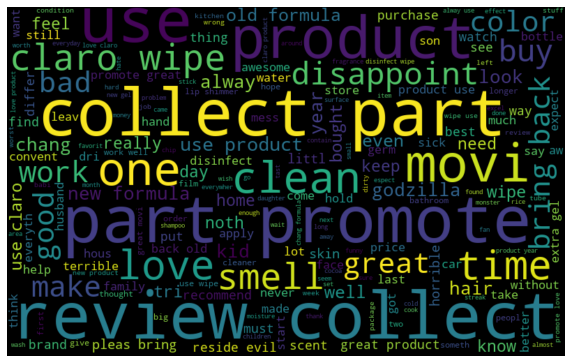

In [58]:
# NEGATIVE SENTIMENT

from wordcloud import WordCloud

neg_sent_words =' '.join([text for text in clean_train['reviews'][clean_train['user_sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_sent_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Some of the most negative sentiment words are collect, part, review, collect.

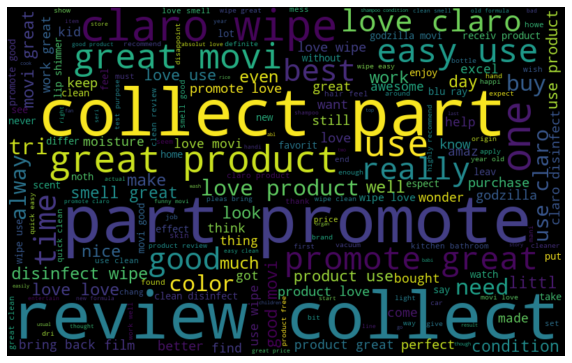

In [59]:
# POSITIVE SENTIMENT

neg_sent_words =' '.join([text for text in clean_train['reviews'][clean_train['user_sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_sent_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

__9. Most frequent word removal__

Here we will remove the most frequent unneccesary words.

There are few words which are common and most frequent in both positive and negative like 

collect, part, promote, review, collect, really, product

which should be removed.

In [60]:
#removing some of the most frequent words.

words_removed= ['collect', 'part', 'promote', 'review', 'really', 'product']

clean_train['reviews'] = clean_train['reviews'].apply(lambda x: ' '.join([w for w in x.split() if w not in (words_removed)]))
clean_train.head()

,user_sentiment,reviews
18740,1.0,fresh smell could bigger like smell clean look get tub sink toilet use disinfect wipe fresh smell wonder rather chemin smell wish wipe larger since find doubt
29820,1.0,work smell great condition leav hair silk feel uncommon hair smell amaz hour rule work howe continue use system
25124,1.0,classic got ta love classic excel remark wait see since miss theater
13630,1.0,love claro wipe like use claro wipe convent disinfect streak like noth brand shall name
9875,1.0,love claro wipe use need gene maintain cleanup like wipe countertop wipe stove etc


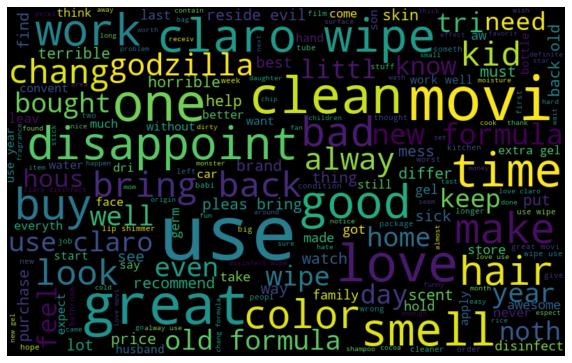

In [61]:
# NEGATIVE SENTIMENT

from wordcloud import WordCloud

neg_sent_words =' '.join([text for text in clean_train['reviews'][clean_train['user_sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_sent_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

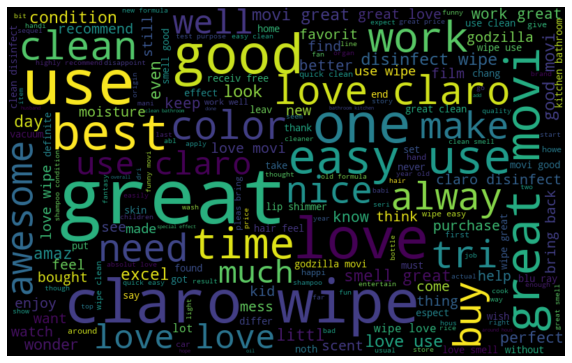

In [62]:
# POSITIVE SENTIMENT

neg_sent_words =' '.join([text for text in clean_train['reviews'][clean_train['user_sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_sent_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Since now we can see both negative and positive do not have any common words.

In [63]:
import re # for regular expressions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from spellchecker import SpellChecker

words_removed= ['collect', 'part', 'promote', 'review', 'really', 'product']

stemmer = PorterStemmer()

spell = SpellChecker()

def clean_review(review_text):
    review_text = re.sub(r"http\S+", "", review_text)                         ## remove the urls
    review_text = re.sub("[^a-zA-Z]", " ", review_text)                       ## remove numbers and puncuation
    review_text = str(review_text).lower()                                    ## converting into lower case
    review_text = word_tokenize(review_text)                                  ## tokenization
    review_text = [i for i in review_text if len(i)>2]                        ## remove the words having length less than 2
    review_text = [i for i in review_text if i not in stopwords.words('english')]  ## remove stop words
    review_text = [stemmer.stem(i) for i in review_text]                           ## stemming 
    review_text = [spell.correction(i) for i in review_text]                       ## spell correction
    review_text = [i for i in review_text if i not in words_removed]
    review_text = ' '.join(review_text)
    
    return(review_text)

In [64]:
clean_review('Fresh Smell - part Could be bigger I really like the smell and clean look I get on my tub, sink and toilet after using the disinfecting wipes.')

'fresh smell could bigger like smell clean look get tub sink toilet use disinfect wipe'

## Extracting Features from Cleaned Reviews.

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [66]:
clean_train.reset_index(inplace=True,drop=True)

### TF-IDF Features

In [67]:
clean_train.shape

(20693, 2)

In [68]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf = tfidf_vectorizer.fit_transform(clean_train['reviews'])
tfidf.shape

(20693, 5000)

In [69]:
import pickle

# Save to file in the current working directory
pkl_filename = "models/tf-idf.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

### Word Embeddings

#### Word2Vec Embeddings


In [70]:
from gensim.models import word2vec
from gensim.models import Word2Vec

C:\Users\GAURAV AGRAWAL\deployment_upgrad\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [71]:
#help(Word2Vec)

In [72]:
clean_train.head()

,user_sentiment,reviews
0,1.0,fresh smell could bigger like smell clean look get tub sink toilet use disinfect wipe fresh smell wonder rather chemin smell wish wipe larger since find doubt
1,1.0,work smell great condition leav hair silk feel uncommon hair smell amaz hour rule work howe continue use system
2,1.0,classic got ta love classic excel remark wait see since miss theater
3,1.0,love claro wipe like use claro wipe convent disinfect streak like noth brand shall name
4,1.0,love claro wipe use need gene maintain cleanup like wipe countertop wipe stove etc


In [73]:
tokenized_reviews = clean_train['reviews'].apply(lambda x: x.split())
model_sg = Word2Vec(tokenized_reviews, vector_size=200,sg=1, min_count=4, seed=34)

In [74]:
model_sg.wv.save_word2vec_format('models/word2vec_model.bin.gz')

Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [75]:
#model= Word2Vec.load('word2vec_model.bin.gz')
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('models/word2vec_model.bin.gz')

In [76]:
model.most_similar(positive="dinner")

[('meal', 0.9385435581207275),
 ('microwave', 0.9168906807899475),
 ('cupboard', 0.9050580263137817),
 ('prep', 0.8998987078666687),
 ('food', 0.8846633434295654),
 ('egg', 0.8810359239578247),
 ('stovetop', 0.872378408908844),
 ('sandwich', 0.8627987504005432),
 ('poultry', 0.8591414093971252),
 ('meat', 0.8584172129631042)]

In [77]:
model.most_similar(positive="good")

[('great', 0.781578004360199),
 ('fantasy', 0.7252081632614136),
 ('outstayed', 0.7180359959602356),
 ('cours', 0.7133367657661438),
 ('pretty', 0.7081538438796997),
 ('decent', 0.7072422504425049),
 ('definatly', 0.7004521489143372),
 ('def', 0.6994993686676025),
 ('beat', 0.6946280002593994),
 ('awesome', 0.6920853853225708)]

In [78]:
model['bad']

array([-0.04768307, -0.27114496,  0.27429995,  0.13856645, -0.26664755,
       -0.04269899,  0.05602913, -0.19169566,  0.40364945, -0.03874983,
       -0.0247394 , -0.09843548,  0.20624094,  0.13640904, -0.18984048,
        0.07433181,  0.19662054,  0.10568983, -0.17840743,  0.18602121,
       -0.19614848,  0.02033542, -0.41588026,  0.28497198, -0.13616435,
       -0.02578395, -0.40134364, -0.2364463 , -0.01841285,  0.28856274,
       -0.16364282,  0.01995267,  0.0503235 ,  0.1319443 , -0.14691663,
       -0.16180167,  0.08720699,  0.18701452, -0.06574918,  0.03388702,
       -0.17530455, -0.09038532,  0.10501759, -0.30495512,  0.07750549,
        0.05342571, -0.09178667, -0.13316573,  0.0046649 , -0.01112299,
        0.10839082,  0.08050845, -0.16552965,  0.04911667,  0.05238346,
       -0.08622122, -0.08164824, -0.2297742 ,  0.3044814 ,  0.0230146 ,
       -0.2207246 ,  0.14637655,  0.16860603, -0.12972865, -0.12127638,
        0.05110993,  0.03774777,  0.10099535, -0.05649064, -0.18

In [79]:
len(model['good']) #The length of the vector is 200

200

__Preparing Vectors for Reviews__

In [80]:
model.key_to_index

{'great': 0,
 'use': 1,
 'love': 2,
 'movi': 3,
 'clean': 4,
 'wipe': 5,
 'good': 6,
 'claro': 7,
 'like': 8,
 'smell': 9,
 'hair': 10,
 'easy': 11,
 'one': 12,
 'work': 13,
 'disinfect': 14,
 'best': 15,
 'make': 16,
 'time': 17,
 'godzilla': 18,
 'get': 19,
 'feel': 20,
 'would': 21,
 'ever': 22,
 'look': 23,
 'well': 24,
 'keep': 25,
 'year': 26,
 'bathroom': 27,
 'condition': 28,
 'old': 29,
 'new': 30,
 'back': 31,
 'color': 32,
 'awesome': 33,
 'better': 34,
 'buy': 35,
 'lip': 36,
 'hous': 37,
 'kid': 38,
 'also': 39,
 'alway': 40,
 'watch': 41,
 'much': 42,
 'tri': 43,
 'kitchen': 44,
 'recommend': 45,
 'scent': 46,
 'convent': 47,
 'nice': 48,
 'need': 49,
 'first': 50,
 'price': 51,
 'formula': 52,
 'skin': 53,
 'enjoy': 54,
 'day': 55,
 'littl': 56,
 'shampoo': 57,
 'leav': 58,
 'quick': 59,
 'home': 60,
 'even': 61,
 'germ': 62,
 'everyth': 63,
 'way': 64,
 'excel': 65,
 'know': 66,
 'dri': 67,
 'family': 68,
 'amaz': 69,
 'pleas': 70,
 'free': 71,
 'help': 72,
 'mess': 73,

We will use the below function to create a vector for each review by taking the average of the vectors of the words present in the review.

In [81]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        if word in model.key_to_index:
            vec += model[word].reshape((1, size))
            count += 1    
    if count != 0:
        vec /= count
    return vec

Preparing word2vec feature set...

In [82]:
wordvec_arrays = np.zeros((len(tokenized_reviews), 200))

for i in range(len(tokenized_reviews)):
    wordvec_arrays[i,:] = word_vector(tokenized_reviews[i], 200)
    
train_word2vec = pd.DataFrame(wordvec_arrays)
train_word2vec.shape    

(20693, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features. 

In [83]:
train_word2vec.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.067620,-0.048775,0.032491,-0.046650,0.029210,0.061661,0.053168,-0.097295,0.222284,0.093565,...,0.135010,-0.230499,0.041242,0.019931,0.066464,0.067453,-0.141743,-0.190039,0.013499,0.174969
1,-0.018594,-0.134873,0.123319,-0.011586,-0.062031,0.059612,0.132953,-0.154991,0.266279,-0.005000,...,-0.021384,-0.226802,-0.116607,-0.032419,0.098792,-0.047408,-0.051638,-0.117610,-0.002558,0.210027
2,-0.041306,-0.239387,0.149932,-0.035575,-0.116921,0.019765,-0.285719,-0.028461,0.245658,0.030207,...,0.181787,-0.205289,-0.100689,0.056216,0.138532,0.102987,-0.139493,-0.190762,0.030972,0.025751
3,-0.017564,-0.147545,-0.034124,-0.123350,0.069268,-0.015047,-0.011330,-0.132909,0.238026,0.102890,...,0.174308,-0.285906,0.072833,0.134383,0.200199,-0.039364,-0.137907,-0.232903,0.079671,0.106570
4,-0.022693,-0.064701,-0.039872,-0.118371,0.057412,0.002015,0.047977,-0.095408,0.170871,0.102665,...,0.126211,-0.254591,0.207598,0.060046,0.162886,0.025542,-0.138033,-0.160129,0.081216,0.155559


## Preparing data for train and test for both tfidf and word2vec.

In [84]:
test.head()

,user_sentiment,reviews
9635,1.0,"Great They clean so well, my kids use them to clean there toys too. This review was collected as part of a promotion."
23049,1.0,Movie is good It was an OK movie. It was cheap it was an OK movie. I don't know if I would buy it again
19374,1.0,"Best thing since.................. I love, love, love this product!!!! These wipes are the best thing since sliced bread. I use them everyday!!!!"
29799,1.0,"I'm Still in Awe I have super fried ends, but very oily roots. I never thought there was a product out there that could tackle both of these things. I'm so happy I was introduced to this condition..."
21655,1.0,"New Formula Not As Good I'm a little late to the party, but like many others have been very disappointed with the new formula for the Exxtra Gel. I had used the older formula for 5-10 years and wa..."


In [85]:
test.shape

(8869, 2)

In [86]:
test['reviews']= test['reviews'].apply(clean_review)

<ipython-input-86-92008f236433>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['reviews']= test['reviews'].apply(clean_review)


In [87]:
test.head()

,user_sentiment,reviews
9635,1.0,great clean well kid use clean toy
23049,1.0,movi good movi cheap movi know would buy
19374,1.0,best thing since love love love wipe best thing since slice bread use everyday
29799,1.0,still awe super fri end oil root never thought could tackle thing happi introduce condition free charge influence definite continue use
21655,1.0,new formula good littl late parti like mani other disappoint new formula extra gel use older formula year happi new version heavy scent hold hairstyle well use time consume expense find replace wo...


In [88]:
test.reset_index(inplace=True, drop= True)

In [89]:
x_train_tfidf= tfidf
y_train_tfidf= clean_train['user_sentiment']

In [90]:
x_test_tfidf= tfidf_vectorizer.transform(test['reviews'])
y_test_tfidf= test['user_sentiment']

In [91]:
x_train_word2vec= train_word2vec.copy()
y_train_word2vec= clean_train['user_sentiment']

In [92]:
tokenized_reviews = test['reviews'].apply(lambda x: x.split())
wordvec_arrays = np.zeros((len(tokenized_reviews), 200))

for i in range(len(tokenized_reviews)):
    wordvec_arrays[i,:] = word_vector(tokenized_reviews[i], 200)
    
test_word2vec = pd.DataFrame(wordvec_arrays)
test_word2vec.shape    

(8869, 200)

In [93]:
x_test_word2vec= test_word2vec.copy()
y_test_word2vec= test['user_sentiment']

In [94]:
print("training X-data shape for tfidf is {0}, word2vec is {1}".format(x_train_tfidf.shape, x_train_word2vec.shape ))
print("training y-data shape for tfidf is {0}, word2vec is {1}".format(y_train_tfidf.shape, y_train_word2vec.shape ))
print("test X-data shape for tfidf is {0}, word2vec is {1}".format(x_test_tfidf.shape, x_test_word2vec.shape ))
print("test y-data shape for tfidf is {0}, word2vec is {1}".format(y_test_tfidf.shape, y_test_word2vec.shape ))

training X-data shape for tfidf is (20693, 5000), word2vec is (20693, 200)
training y-data shape for tfidf is (20693,), word2vec is (20693,)
test X-data shape for tfidf is (8869, 5000), word2vec is (8869, 200)
test y-data shape for tfidf is (8869,), word2vec is (8869,)


## Handling the class imbalance using SMOTE



In [95]:
y_train_tfidf.value_counts(normalize=True)

1.0    0.887063
0.0    0.112937
Name: user_sentiment, dtype: float64

In [96]:
y_train_word2vec.value_counts(normalize=True)

1.0    0.887063
0.0    0.112937
Name: user_sentiment, dtype: float64

In [97]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=26)
x_train_tfidf, y_train_tfidf = oversample.fit_resample(x_train_tfidf, y_train_tfidf)
x_train_word2vec, y_train_word2vec = oversample.fit_resample(x_train_word2vec, y_train_word2vec)

In [98]:
y_train_tfidf.value_counts(normalize=True)

0.0    0.5
1.0    0.5
Name: user_sentiment, dtype: float64

In [99]:
y_train_word2vec.value_counts(normalize=True)

0.0    0.5
1.0    0.5
Name: user_sentiment, dtype: float64

In [100]:
x_train_tfidf.shape, y_train_tfidf.shape

((36712, 5000), (36712,))

In [101]:
x_train_word2vec.shape, y_train_word2vec.shape

((36712, 200), (36712,))

---

## Model Building

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — TF-IDF, word2vec vectors. We will use the following algorithms to build models:

1. Logistic Regression
2. Naive Bayes
3. XGBoost

### 1. Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

#### TF-IDF Features

In [103]:
lreg= LogisticRegression(random_state=22, n_jobs=-1)

lreg.fit(x_train_tfidf, y_train_tfidf)

prediction_train = lreg.predict_proba(x_train_tfidf)
prediction_test = lreg.predict_proba(x_test_tfidf)

In [104]:
roc_auc_score(y_train_tfidf, prediction_train[:,1])

0.9648007473293622

In [105]:
roc_auc_score(y_test_tfidf, prediction_test[:,1])

0.9046819183248936

ROC_AUC score is: 0.90

#### Word2Vec Features

In [106]:
lreg= LogisticRegression(random_state=22, n_jobs=-1)

lreg.fit(x_train_word2vec, y_train_word2vec)

prediction_train = lreg.predict_proba(x_train_word2vec)
prediction_test = lreg.predict_proba(x_test_word2vec)

In [107]:
roc_auc_score(y_train_word2vec, prediction_train[:,1])

0.8517121600745832

In [108]:
roc_auc_score(y_test_word2vec, prediction_test[:,1])

0.8208643031416917

ROC_AUC score is: 0.82

### 2. Naive Bayes

In [109]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score, roc_auc_score

#### TF-IDF Features

In [110]:
# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(x_train_tfidf, y_train_tfidf)

# predict class
prediction_train = bnb.predict_proba(x_train_tfidf)
prediction_test = bnb.predict_proba(x_test_tfidf)

In [111]:
roc_auc_score(y_train_tfidf, prediction_train[:,1])

0.8967170789519558

In [112]:
roc_auc_score(y_test_tfidf, prediction_test[:,1])

0.7408991357274646

ROC_AUC score is: 0.74

#### Word2Vec Features

In [113]:
# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(x_train_word2vec, y_train_word2vec)

# predict class
prediction_train = bnb.predict_proba(x_train_word2vec)
prediction_test = bnb.predict_proba(x_test_word2vec)

In [114]:
roc_auc_score(y_train_word2vec, prediction_train[:,1])

0.7242635051197543

In [115]:
roc_auc_score(y_test_word2vec, prediction_test[:,1])

0.7101197881835993

ROC_AUC score is: 0.71

### 3. XGBoost

In [116]:
from xgboost import XGBClassifier

In [117]:
#help(XGBClassifier)

#### TF-IDF Features

In [118]:
xgb = XGBClassifier()

# fit 
xgb.fit(x_train_tfidf, y_train_tfidf)

C:\Users\GAURAV AGRAWAL\deployment_upgrad\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
# predict class
prediction_train = xgb.predict_proba(x_train_tfidf)
prediction_test = xgb.predict_proba(x_test_tfidf)

In [120]:
roc_auc_score(y_train_tfidf, prediction_train[:,1])

0.9904349993169167

In [121]:
roc_auc_score(y_test_tfidf, prediction_test[:,1])

0.8817342276511099

ROC_AUC score is: 0.88

#### Word2Vec Features

In [122]:
xgb = XGBClassifier()

# fit 
xgb.fit(x_train_word2vec, y_train_word2vec)

C:\Users\GAURAV AGRAWAL\deployment_upgrad\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
# predict class
prediction_train = xgb.predict_proba(x_train_word2vec)
prediction_test = xgb.predict_proba(x_test_word2vec)

C:\Users\GAURAV AGRAWAL\deployment_upgrad\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [124]:
roc_auc_score(y_train_word2vec, prediction_train[:,1])

0.9997922065309044

In [125]:
roc_auc_score(y_test_word2vec, prediction_test[:,1])

0.8223923893210336

ROC_AUC score is: 0.82

Let's build a table representing all the ROC_AUC score for all the 3 models using 2 feature extraction method on the test data.


| Model/Feature | TF-IDF | WORD_2_VEC |
| :- | -: | :-: |
| LogReg  | 0.90 | 0.82
| NV      | 0.74 | 0.71
| XGBoost | 0.88 | 0.82


So as we can see without doing the hyperparametre tuning, NV is not performing well. Other LogReg and XGBoost are doing well but clearly overfitted.

The word_2_vec feature extraction is also not giving as good result as TF-IDF. So we will choose TF-IDF from now onwards to select the best HP.

__General Approach for Parameter Tuning__

We will now tune our hyperparametres to get the best the model as the default ones are overfitting. Since NV is not performing that well, we only do the HT for LogReg and XGBoost.

### 1. HT for LogReg.

In [126]:
#help(LogisticRegression

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# creating a KFold object 
#folds = StratifiedKFold(n_splits=3,random_state=1,shuffle=True)

# specify range of hyperparameters

param_grid = {'C': [0.001,0.01,1,100]}         


# specify model
lm = LogisticRegression(solver='newton-cg',penalty='l2', random_state=34)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      
# fit the model
model_cv.fit(x_train_tfidf, y_train_tfidf)       

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=34, solver='newton-cg'),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 1, 100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [128]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.400585,0.021889,0.022203,0.005814,0.001,{'C': 0.001},0.842972,0.837013,0.831524,0.837170,0.004675,4,0.847284,0.836953,0.838500,0.840912,0.004549
1,0.800996,0.049174,0.015234,0.002121,0.01,{'C': 0.01},0.870732,0.871887,0.867535,0.870051,0.001841,3,0.878663,0.871389,0.873801,0.874618,0.003025
2,0.901262,0.040531,0.013787,0.002426,1,{'C': 1},0.946130,0.952848,0.950510,0.949829,0.002785,2,0.964131,0.962534,0.963451,0.963372,0.000655
3,2.219945,0.113724,0.012205,0.002128,100,{'C': 100},0.953480,0.958659,0.956942,0.956361,0.002154,1,0.990199,0.989139,0.990041,0.989793,0.000467


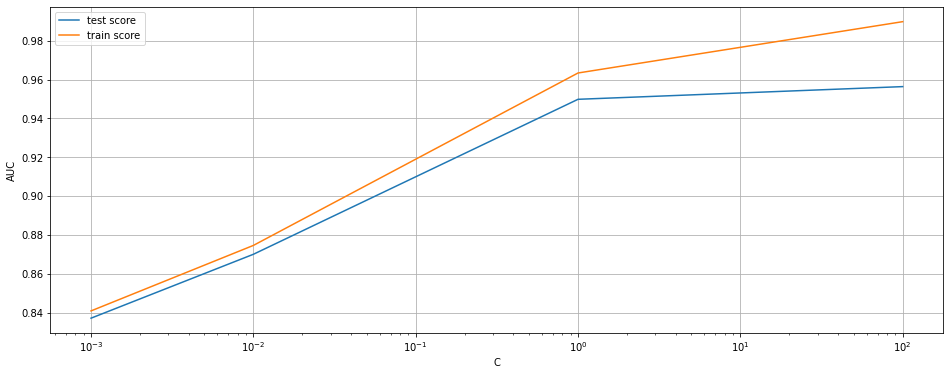

In [129]:
plt.figure(figsize=(16,6))
dfc=cv_results.copy()
plt.plot(dfc["param_C"], dfc["mean_test_score"])
plt.plot(dfc["param_C"], dfc["mean_train_score"])
plt.xlabel('C')
plt.ylabel('AUC')
plt.xscale('log')
plt.grid()
plt.legend(['test score', 'train score'], loc='upper left')

In [130]:
lreg= LogisticRegression(penalty='l2', C=0.1, solver='newton-cg', random_state=34, n_jobs=-1)

lreg.fit(x_train_tfidf, y_train_tfidf)

prediction_train = lreg.predict_proba(x_train_tfidf)
prediction_test = lreg.predict_proba(x_test_tfidf)

In [131]:
roc_auc_score(y_train_tfidf, prediction_train[:,1])

0.9324361143075659

In [132]:
roc_auc_score(y_test_tfidf, prediction_test[:,1])

0.8910730563559969

ROC_AUC score is: 0.89

### 1. HT for XGBoost.

In [133]:
#help(XGBClassifier)

XGBClassifier    (base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
#tuningn the n_estimators.
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.5, 0.9]}         


# specify model
lm = XGBClassifier(n_estimators=500, random_state=32)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 3,
                        verbose=1,
                        n_jobs=-1,
                        return_train_score=True)      
# fit the model
model_cv.fit(x_train_tfidf, y_train_tfidf)       

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\GAURAV AGRAWAL\deployment_upgrad\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, random_state=32,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [135]:
model_cv.best_params_

{'learning_rate': 0.5}

In [113]:
#tuningn the max_depth of the tree and min child weight.

param_grid = {'max_depth':[3,5,6],
              'min_child_weight':[1,3,5]}     


# specify model
lm = XGBClassifier(learning_rate= 0.5, n_estimators=500, random_state=32)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 3,
                        verbose=1,
                        n_jobs=-1,
                        return_train_score=True)      
# fit the model
model_cv.fit(x_train_tfidf, y_train_tfidf)       

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\GAURAV AGRAWAL\deployment_upgrad\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.5, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, random_state=32,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [114]:
model_cv.best_params_

{'max_depth': 6, 'min_child_weight': 1}

In [115]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,122.808635,0.209070,0.137667,0.047592,3,1,"{'max_depth': 3, 'min_child_weight': 1}",0.958971,0.989549,0.988154,0.978891,0.014097,5,0.999547,0.997037,0.997563,0.998049,0.001080
1,119.760300,0.523865,0.109666,0.009177,3,3,"{'max_depth': 3, 'min_child_weight': 3}",0.956028,0.988279,0.985682,0.976663,0.014630,8,0.999069,0.995744,0.995907,0.996907,0.001530
2,117.499422,0.625154,0.097709,0.013901,3,5,"{'max_depth': 3, 'min_child_weight': 5}",0.953288,0.986696,0.984781,0.974922,0.015317,9,0.998545,0.993794,0.994494,0.995611,0.002095
3,190.318417,0.590497,0.172818,0.036388,5,1,"{'max_depth': 5, 'min_child_weight': 1}",0.962080,0.993374,0.991126,0.982193,0.014252,2,0.999997,0.999729,0.999828,0.999851,0.000111
4,182.737310,1.188507,0.138592,0.018769,5,3,"{'max_depth': 5, 'min_child_weight': 3}",0.958192,0.991305,0.989205,0.979567,0.015139,3,0.999959,0.999156,0.999387,0.999501,0.000337
5,181.837719,3.634476,0.144030,0.021410,5,5,"{'max_depth': 5, 'min_child_weight': 5}",0.955084,0.989205,0.986606,0.976965,0.015509,7,0.999851,0.998334,0.998668,0.998951,0.000651
6,229.764537,0.517089,0.131147,0.004350,6,1,"{'max_depth': 6, 'min_child_weight': 1}",0.962269,0.994526,0.991765,0.982853,0.014599,1,1.000000,0.999915,0.999940,0.999952,0.000036
7,219.502161,1.988555,0.138774,0.022708,6,3,"{'max_depth': 6, 'min_child_weight': 3}",0.957870,0.991136,0.989545,0.979517,0.015321,4,0.999985,0.999609,0.999717,0.999770,0.000158
8,104.580069,35.402177,0.123443,0.003456,6,5,"{'max_depth': 6, 'min_child_weight': 5}",0.954975,0.990099,0.987776,0.977617,0.016038,6,0.999937,0.999121,0.999276,0.999445,0.000354


In [162]:
#tuningn the max_depth of the tree and min child weight.

param_grid =  {'gamma':[0.1, 1, 10, 100]}


# specify model
lm = XGBClassifier(max_depth= 5, min_child_weight= 3, learning_rate= 0.5, 
                   n_estimators= 500, random_state= 32)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      
# fit the model
model_cv.fit(x_train_tfidf, y_train_tfidf)       

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\GAURAV AGRAWAL\deployment_upgrad\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.5, max_delta_step=None,
                                     max_depth=5, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, random_state=32,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate

In [163]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,179.649431,1.514027,0.137705,0.029707,0.1,{'gamma': 0.1},0.957318,0.990923,0.989026,0.979089,0.015414,2,0.999950,0.999142,0.999358,0.999483,0.000341
1,177.652381,2.118559,0.105523,0.013741,1,{'gamma': 1},0.957866,0.991155,0.988508,0.979177,0.015107,1,0.999816,0.998697,0.998862,0.999125,0.000493
2,149.039395,38.623857,0.067710,0.007367,10,{'gamma': 10},0.946639,0.976617,0.974174,0.965810,0.013593,3,0.990639,0.979413,0.980773,0.983608,0.005002
3,102.719573,2.083426,0.030499,0.012803,100,{'gamma': 100},0.878631,0.911642,0.907577,0.899283,0.014698,4,0.923499,0.901166,0.901032,0.908566,0.010560


In [117]:
model_cv.best_params_

{'gamma': 0.3}

In [118]:
#tuningn the max_depth of the tree and min child weight.

param_grid =  {'subsample':[0.7, 0.8, 0.9],
               'colsample_bytree':[0.7, 0.8, 0.9]}


# specify model
lm = XGBClassifier(max_depth= 5, min_child_weight= 3, learning_rate= 0.5, 
                   n_estimators= 500, gamma= 0.3, random_state= 32)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      
# fit the model
model_cv.fit(x_train_tfidf, y_train_tfidf)       

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\GAURAV AGRAWAL\deployment_upgrad\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:21:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0.3,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.5, max_delta_step=None,
                                     max_depth=5, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, random_state=32,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_

In [119]:
model_cv.best_params_

{'colsample_bytree': 0.9, 'subsample': 0.9}

In [120]:
#tuningn the max_depth of the tree and min child weight.

param_grid =  {'reg_alpha':[0.01, 0.1, 1, 10]}


# specify model
lm = XGBClassifier(max_depth= 5, min_child_weight= 3, learning_rate= 0.5, 
                   n_estimators= 500, gamma= 0.3, colsample_bytree= 0.9, 
                   subsample= 0.9, random_state= 32)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      
# fit the model
model_cv.fit(x_train_tfidf, y_train_tfidf)       

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\GAURAV AGRAWAL\deployment_upgrad\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9, gamma=0.3,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.5, max_delta_step=None,
                                     max_depth=5, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, random_state=32,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.9,
                                     tree_method=None, validate_pa

In [121]:
model_cv.best_params_

{'reg_alpha': 1}

In [136]:
xgb = XGBClassifier(max_depth= 3, min_child_weight= 15, learning_rate= 0.2, 
                   n_estimators= 500, gamma= 10, colsample_bytree= 0.7, 
                   subsample= 0.7, reg_alpha=10, random_state= 32)


xgb.fit(x_train_tfidf, y_train_tfidf)

[20:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=15, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=32,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [137]:
# predict class
prediction_train = xgb.predict_proba(x_train_tfidf)
prediction_test = xgb.predict_proba(x_test_tfidf)

In [138]:
roc_auc_score(y_train_tfidf, prediction_train[:,1])

0.9621308515165616

In [139]:
roc_auc_score(y_test_tfidf, prediction_test[:,1])

0.8762945851741782

Based on the HT on logreg and xgboost on tfidf feature that, our model would be of logreg as it's ROC_AUC is more also.

We will now decide the cutoff for our positive and negative sentiments.

In [140]:
lreg= LogisticRegression(penalty='l2', C=0.1, solver='newton-cg', random_state=34, n_jobs=-1)

lreg.fit(x_train_tfidf, y_train_tfidf)

prediction_train = lreg.predict_proba(x_train_tfidf)
prediction_test = lreg.predict_proba(x_test_tfidf)

In [141]:
roc_auc_score(y_train_tfidf, prediction_train[:,1])

0.9324361143075659

In [142]:
roc_auc_score(y_test_tfidf, prediction_test[:,1])

0.8910730563559969

In [210]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

In [212]:
#help(f1_score)

In [213]:
cut_off= [x/10 for x in range(1,10)]
cut_off_df= pd.DataFrame(columns=['cutoff','f1_score','sensitivity','specificity'])

for n,m in enumerate(cut_off):
    test_df_final= list(map((lambda x: 0 if x<m else 1),prediction_test[:,1]))
    f1_scor= f1_score(y_test_tfidf,test_df_final)
    cm= confusion_matrix(y_test_tfidf,test_df_final)
    sensitivity= round(cm[1,1]/(cm[1,0]+cm[1,1]),2)
    specificity= cm[0,0]/(cm[0,1]+cm[0,0])
    cut_off_df.loc[n]=[m,f1_scor,sensitivity,specificity]
cut_off_df

,cutoff,f1_score,sensitivity,specificity
0,0.1,0.942036,1.00,0.035141
1,0.2,0.946864,0.99,0.188755
2,0.3,0.945968,0.97,0.394578
3,0.4,0.931737,0.91,0.616466
4,0.5,0.888246,0.82,0.799197
5,0.6,0.802858,0.68,0.914659
6,0.7,0.679428,0.52,0.973896
7,0.8,0.491728,0.33,0.986948
8,0.9,0.256944,0.15,0.996988


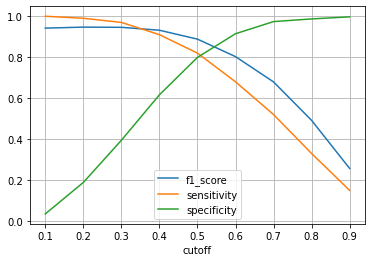

In [215]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cut_off_df.plot.line(x='cutoff', y=['f1_score','sensitivity','specificity'])
plt.grid()
plt.show()

Cut off would be 0.5 which is the default.

now saving the model in pickel format and load to predict any review.

In [143]:
import pickle


# Save to file in the current working directory
pkl_filename = "models/logreg_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lreg, file)

In [144]:
# Load from file

with open('models/logreg_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [145]:
with open('models/tf-idf.pkl', 'rb') as file:
    tf1 = pickle.load(file)

In [146]:
#help(TfidfVectorizer)

In [147]:
#tf1.vocabulary_

In [148]:
azx= tf1.transform(['my name is khan'])

In [149]:
azx.shape

(1, 5000)

In [151]:
import re # for regular expressions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pickle

words_removed= ['collect', 'part', 'promote', 'review', 'really', 'product']

stemmer = PorterStemmer()

spell = SpellChecker()

with open('models/logreg_model.pkl', 'rb') as file:
    model = pickle.load(file)
    
with open('models/tf-idf.pkl', 'rb') as file:
    tf_idf = pickle.load(file)
    

class get_sentiment():
    
    def __init__(self):
        
        return None
    
    def clean_review(self, review_text):
        review_text = re.sub(r"http\S+", "", review_text)                         ## remove the urls
        review_text = re.sub("[^a-zA-Z]", " ", review_text)                       ## remove numbers and puncuation
        review_text = str(review_text).lower()                                    ## converting into lower case
        review_text = word_tokenize(review_text)                                  ## tokenization
        review_text = [i for i in review_text if len(i)>2]                        ## remove the words having length less than 2
        review_text = [i for i in review_text if i not in stopwords.words('english')]  ## remove stop words
        review_text = [stemmer.stem(i) for i in review_text]                           ## stemming 
        review_text = [spell.correction(i) for i in review_text]                       ## spell correction
        review_text = [i for i in review_text if i not in words_removed]
        review_text = ' '.join(review_text)
        
        return(review_text)
    
    def sentiment (self, review_text):
        
        review_text = self.clean_review(review_text)
        
        X = tf_idf.transform([review_text])
        
        y= model.predict(X)
        
        return(int(y))
        
        

In [152]:
sdd= get_sentiment()

In [153]:
review= "Fresh Smell - part Could be bigger I really like the smell and clean look I get on my tub, sink and toilet after using the disinfecting wipes."

print(review)

Fresh Smell - part Could be bigger I really like the smell and clean look I get on my tub, sink and toilet after using the disinfecting wipes.


In [154]:
sdd.clean_review(review)

'fresh smell could bigger like smell clean look get tub sink toilet use disinfect wipe'

In [155]:
sdd.sentiment(review)

1